## Switching Pattern Discovery
Section 5.2 in the paper

In [1]:
import os
wd = os.path.normpath(os.getcwd() + '/..')
os.chdir(wd)
os.getcwd()

'/Users/mikchip/soccercpd'

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sympy.combinatorics import Permutation
from sympy.interactive import init_printing
import matplotlib.pyplot as plt
from src.myconstants import *

In [3]:
init_printing(perm_cyclic=True, pretty_print=False)

In [4]:
# Choose an activity to analyze
activity_id = 17985

In [5]:
fgp_path = f'data/fgp_avg/{activity_id}.csv'
fgp_df = pd.read_csv(fgp_path, header=0, encoding='utf-8-sig')
fgp_df['datetime'] = pd.to_datetime(fgp_df['datetime'])
fgp_df['roleperm'] = fgp_df.apply(lambda x: (x['base_role'], x['role']), axis=1)
fgp_df

,player_id,squad_num,player_name,datetime,session,gametime,player_period,form_period,role_period,x,y,x_norm,y_norm,role,base_role,switch_rate,roleperm
0,4181,2,P02,2020-01-01 19:00:01,1,00:01.0,1,1,1,4667.0,512.0,-58.0,-2862.6,1,1,0.2,"(1, 1)"
1,4181,2,P02,2020-01-01 19:00:02,1,00:02.0,1,1,1,4694.0,388.0,-37.5,-2982.2,1,1,0.2,"(1, 1)"
2,4181,2,P02,2020-01-01 19:00:03,1,00:03.0,1,1,1,4657.0,315.0,-112.2,-3034.6,1,1,0.0,"(1, 1)"
3,4181,2,P02,2020-01-01 19:00:04,1,00:04.0,1,1,1,4681.0,340.0,-155.1,-3033.7,1,1,0.0,"(1, 1)"
4,4181,2,P02,2020-01-01 19:00:05,1,00:05.0,1,1,1,4718.0,440.0,-185.7,-3017.1,1,1,0.0,"(1, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56352,4142,99,P99,2020-01-01 20:48:56,2,47:56.0,4,4,5,2624.0,1881.0,1072.1,-1456.9,10,10,0.5,"(10, 10)"
56353,4142,99,P99,2020-01-01 20:48:57,2,47:57.0,4,4,5,2438.0,1801.0,1010.5,-1469.9,10,10,0.5,"(10, 10)"
56354,4142,99,P99,2020-01-01 20:48:58,2,47:58.0,4,4,5,2269.0,1820.0,884.9,-1349.0,10,10,0.5,"(10, 10)"
56355,4142,99,P99,2020-01-01 20:48:59,2,47:59.0,4,4,5,2171.0,1959.0,781.4,-1169.7,10,10,0.5,"(10, 10)"


In [6]:
roleperms = fgp_df.pivot_table(
    values='roleperm', index='datetime', columns='player_name', aggfunc='first'
)
roleperms['switch_rate'] = fgp_df.groupby('datetime')['switch_rate'].first()
roleperms

player_name,P02,P06,P09,P10,P20,P23,P24,P30,P32,P42,P47,P70,P99,switch_rate
datetime,,,,,,,,,,,,,,
2020-01-01 19:00:01,"(1, 1)","(2, 2)","(3, 5)",NaN,"(4, 4)","(5, 3)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.2
2020-01-01 19:00:02,"(1, 1)","(2, 2)","(3, 5)",NaN,"(4, 4)","(5, 3)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.2
2020-01-01 19:00:03,"(1, 1)","(2, 2)","(3, 3)",NaN,"(4, 4)","(5, 5)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.0
2020-01-01 19:00:04,"(1, 1)","(2, 2)","(3, 3)",NaN,"(4, 4)","(5, 5)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.0
2020-01-01 19:00:05,"(1, 1)","(2, 2)","(3, 3)",NaN,"(4, 4)","(5, 5)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 20:48:56,"(1, 1)","(2, 4)",NaN,"(9, 3)",NaN,NaN,"(3, 6)","(7, 7)","(6, 9)","(4, 2)","(8, 8)","(5, 5)","(10, 10)",0.5
2020-01-01 20:48:57,"(1, 1)","(2, 4)",NaN,"(9, 3)",NaN,NaN,"(3, 6)","(7, 7)","(6, 9)","(4, 2)","(8, 8)","(5, 5)","(10, 10)",0.5
2020-01-01 20:48:58,"(1, 1)","(2, 4)",NaN,"(9, 3)",NaN,NaN,"(3, 6)","(7, 7)","(6, 9)","(4, 2)","(8, 8)","(5, 5)","(10, 10)",0.5


In [7]:
def decompose_to_cycles(roleperm):
    if roleperm['switch_rate'] > MAX_SWITCH_RATE:
        return []
    
    perm_list = [0] + [r for (l, r) in sorted([t for t in roleperm[:-1] if str(t) != 'nan'])]
    if len(perm_list) < 11:
        return []
    
    p = Permutation(perm_list)
    perm_str = str(p)
    
    result_list = []
    cycles_str = perm_str.split(')')
    for c in cycles_str:
        c = c.replace('(', '')
        result_list.append(c.split(' '))
        
    return [s for s in result_list if len(s) > 1]

In [8]:
cycles = roleperms.apply(decompose_to_cycles, axis=1)
cycle_list = [(dt, ' '.join(c)) for dt, cycles_t in cycles.iteritems() for c in cycles_t]
cycles_flatten = pd.Series([c for (dt, c) in cycle_list], index=[dt for (dt, c) in cycle_list])
cycles_flatten

2020-01-01 19:00:01         3 5
2020-01-01 19:00:02         3 5
2020-01-01 19:00:12    1 10 4 2
2020-01-01 19:00:13    1 10 4 2
2020-01-01 19:00:14    1 10 4 2
                         ...   
2020-01-01 20:48:58       3 6 9
2020-01-01 20:48:59         2 4
2020-01-01 20:48:59       3 6 9
2020-01-01 20:49:00         2 3
2020-01-01 20:49:00         6 9
Length: 3550, dtype: object

In [9]:
role_records = pd.read_csv(f'data/role_records.csv', header=0, encoding='utf-8-sig')
role_record = role_records[role_records['activity_id'] == activity_id].copy()
role_record['start_dt'] = pd.to_datetime(role_record['start_dt'])
role_record['end_dt'] = pd.to_datetime(role_record['end_dt'])
role_record

,activity_id,session,player_period,form_period,role_period,start_dt,end_dt,duration,player_id,squad_num,player_name,base_role,x,y,formation,aligned_role
17105,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,4181,2,P02,1,-719.0,-1748.0,4231,RB
17106,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,5516,6,P06,2,-1292.0,-701.0,4231,RCB
17107,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,4650,9,P09,3,1640.0,-83.0,4231,CF
17108,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,1853,20,P20,4,-151.0,-568.0,4231,RDM
17109,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,3574,23,P23,5,991.0,32.0,4231,CAM
17110,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,4183,24,P24,6,49.0,751.0,4231,LDM
17111,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,5608,30,P30,7,-1418.0,548.0,4231,LCB
17112,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,1365,47,P47,8,-584.0,1846.0,4231,LB
17113,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,5488,70,P70,9,828.0,1736.0,4231,LM
17114,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060,4142,99,P99,10,655.0,-1812.0,4231,RM


In [10]:
role_time_table = pd.concat([
    role_record.pivot_table(values='session', index='role_period', aggfunc='first'),
    role_record.pivot_table(values='start_dt', index='role_period', aggfunc='min'),
    role_record.pivot_table(values='end_dt', index='role_period', aggfunc='max'),
    role_record.pivot_table(values='formation', index='role_period', aggfunc='first')
    ], axis=1
)
role_time_table['session_str'] = role_time_table['session'].apply(lambda x: f"{x}{'st' if x==1 else 'nd'}")
half_start = role_time_table.groupby('session').apply(lambda x: x['start_dt'].min())
role_time_table['title'] = role_time_table.apply(
    lambda x: f"{x['session_str']} Half {(x['start_dt'] - half_start[x['session']]).components[2]}'~"
              f"{(x['end_dt'] - half_start[x['session']]).components[2]}': {'-'.join(x['formation'])}", 
    axis=1
)
role_time_table

,session,start_dt,end_dt,formation,session_str,title
role_period,,,,,,
1,1,2020-01-01 19:00:00,2020-01-01 19:17:40,4231,1st,1st Half 0'~17': 4-2-3-1
2,1,2020-01-01 19:17:40,2020-01-01 19:46:00,433,1st,1st Half 17'~46': 4-3-3
3,2,2020-01-01 20:01:00,2020-01-01 20:14:00,433,2nd,2nd Half 0'~13': 4-3-3
4,2,2020-01-01 20:14:00,2020-01-01 20:41:00,442,2nd,2nd Half 13'~40': 4-4-2
5,2,2020-01-01 20:41:00,2020-01-01 20:49:00,442,2nd,2nd Half 40'~48': 4-4-2


In [11]:
role_position_table = role_record.pivot_table(
    values='aligned_role', index='role_period', columns='base_role', aggfunc='first'
)
role_position_table

base_role,1,2,3,4,5,6,7,8,9,10
role_period,,,,,,,,,,
1,RB,RCB,CF,RDM,CAM,LDM,LCB,LB,LM,RM
2,RB,RCB,CF,CDM,RCM,LCM,LCB,LB,LM,RM
3,RB,RCB,CF,CDM,RCM,LCM,LCB,LB,LM,RM
4,RB,RCB,LCF,RCM,RCF,LCM,LCB,LB,LM,RM
5,RB,RCB,LCF,RCM,RCF,LCM,LCB,LB,LM,RM


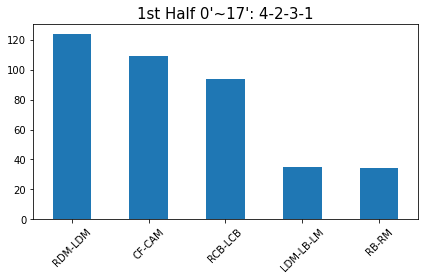

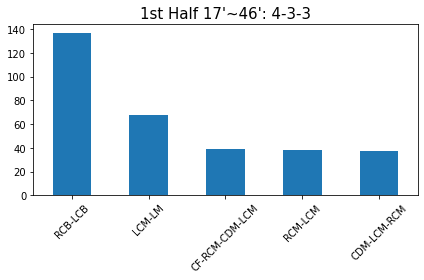

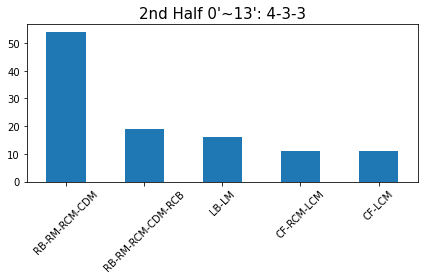

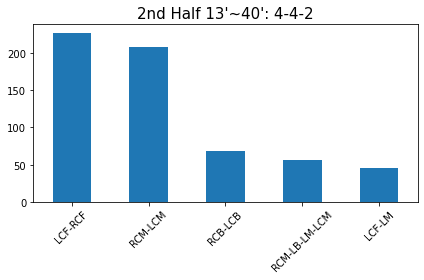

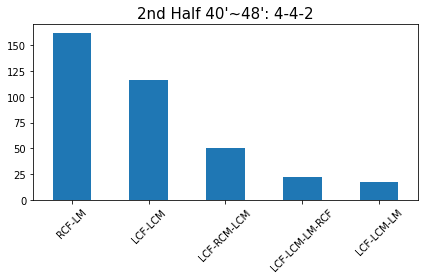

In [12]:
for i in role_time_table.index:
    role_time = role_time_table.loc[i]
    role_position = role_position_table.loc[i]
    position_cycles = cycles_flatten[(cycles_flatten.index >= role_time['start_dt']) &
                                     (cycles_flatten.index < role_time['end_dt'])].to_frame(name='role')
    position_cycles['position'] = position_cycles['role'].apply(
        lambda x: '-'.join([role_position[int(s)] for s in x.split(' ')])
    )
    plt.figure(i)
    vc = position_cycles['position'].value_counts()[:5]
    vc.plot.bar()
    plt.gca().title.set_text(role_time['title'])
    plt.gca().title.set_size(15)
    plt.xticks(rotation=45)
    plt.tight_layout()